<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train Dataset

In [4]:
train = pd.read_csv('C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\train.csv')
train.tail()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589
201916,2017-07,C_ID_92c9984c58,3,1,1,-1.859413


In [5]:
len(train['card_id'].unique())

201917

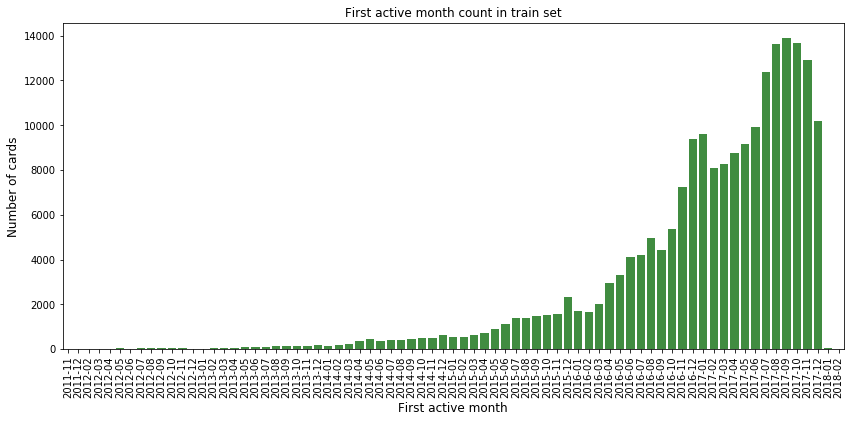

In [6]:
cnt_srs = train['first_active_month'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()



## EDA 

### Target Variable

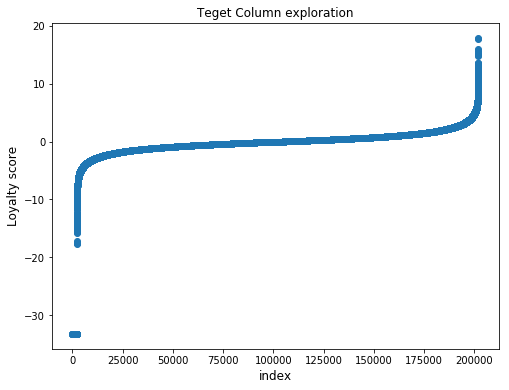

In [7]:
target_col = "target"            # Loyalty Points

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('Loyalty score', fontsize = 12)
plt.title('Teget Column exploration')
plt.show()


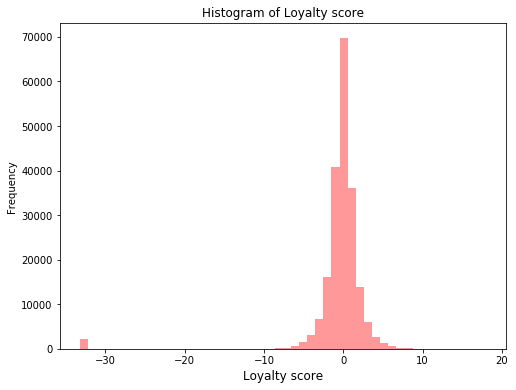

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train[target_col].values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.ylabel('Frequency')
plt.show()

In [9]:
(train['target']< -30).sum()     # 1% of data lessthan -30

2207

### Features

In [10]:
print(train['feature_1'].unique())
print(train['feature_2'].unique())
print(train['feature_3'].unique())

[5 4 2 1 3]
[2 1 3]
[1 0]


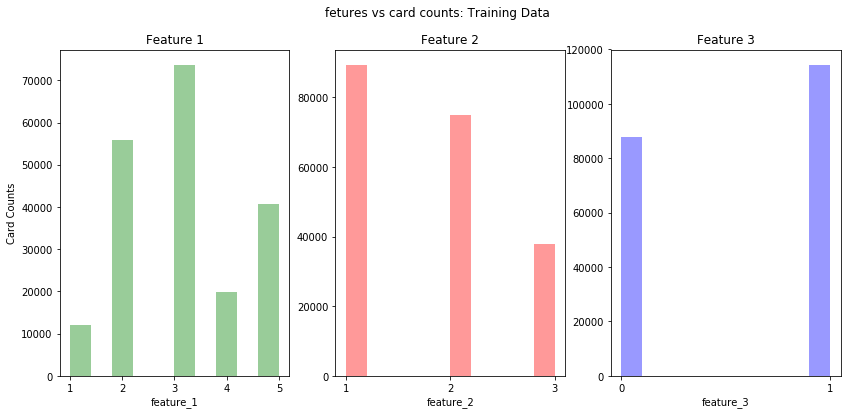

In [11]:
f, axes = plt.subplots(figsize=(14,6), nrows=1, ncols=3)
sns.distplot(train.feature_1, ax = axes[0], kde = False, color = 'green', bins=10).set_title('Feature 1')

sns.distplot(train.feature_2, ax = axes[1], kde = False, color = 'red', bins=10).set_title("Feature 2") 
axes[0].set(ylabel='Card Counts')

sns.distplot(train.feature_3, ax = axes[2], kde = False, color = 'blue', bins=10).set_title("Feature 3") 

f.suptitle('fetures vs card counts: Training Data')
axes[0].set_xticks(np.arange(1,6,1))
axes[1].set_xticks(np.arange(1,4,1))
axes[2].set_xticks(np.arange(0,2,1))
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


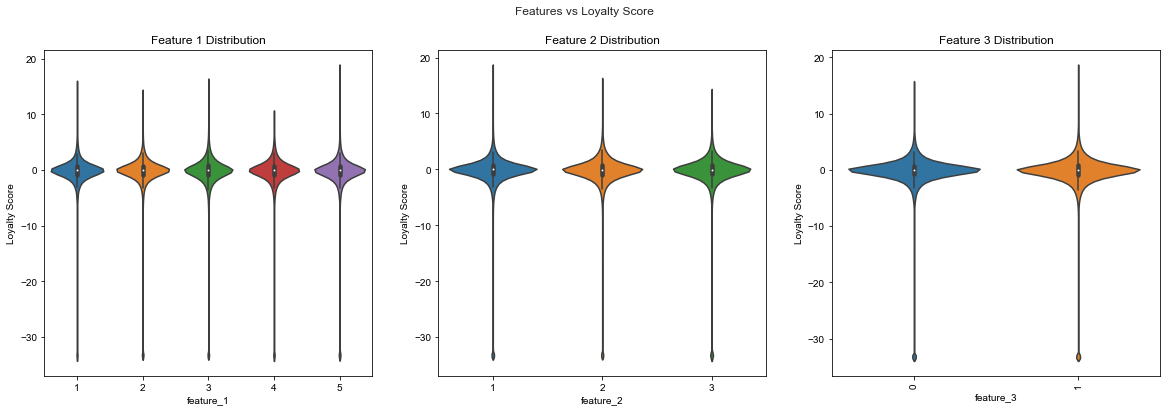

In [12]:
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=3)
sns.set_style("whitegrid")
sns.violinplot(x="feature_1", y = target_col, data = train, ax = ax[0]).set_title('Feature 1 Distribution')
ax[0].set(ylabel = 'Loyalty Score')

sns.violinplot(x="feature_2", y = target_col, data = train, ax = ax[1]).set_title('Feature 2 Distribution')
ax[1].set(ylabel = 'Loyalty Score')

sns.violinplot(x="feature_3", y = target_col, data = train, ax = ax[2]).set_title('Feature 3 Distribution')
ax[2].set(ylabel = 'Loyalty Score')

plt.xticks(rotation = 'vertical')
fig.suptitle('Features vs Loyalty Score')
plt.show()

# Historical Transactions Dataset

In [13]:
hist_trans = pd.read_csv('C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\historical_transactions.csv', 
                        nrows = 500000)
hist_trans.tail(20)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
499980,Y,C_ID_9de1e4b340,161,N,0,A,705,M_ID_e78094bb40,-3,-0.695532,2017-11-22 23:58:35,3.0,3,33
499981,Y,C_ID_9de1e4b340,161,N,0,A,367,M_ID_77e71ee8f0,-7,-0.631955,2017-07-22 10:25:15,3.0,3,16
499982,N,C_ID_9de1e4b340,161,N,0,A,367,M_ID_77e71ee8f0,0,-0.726697,2018-02-08 13:11:53,3.0,3,16
499983,Y,C_ID_9de1e4b340,161,N,0,A,705,M_ID_e78094bb40,-8,-0.725360,2017-06-09 12:02:01,3.0,3,33
499984,Y,C_ID_9de1e4b340,161,N,0,A,506,M_ID_c9e7e211c1,-8,-0.624893,2017-06-08 11:04:25,3.0,3,30
499985,Y,C_ID_9de1e4b340,161,N,0,A,437,M_ID_df7219fd1e,-1,-0.607447,2018-01-16 15:01:34,3.0,3,15
499986,Y,C_ID_9de1e4b340,161,N,0,A,705,M_ID_e78094bb40,-2,-0.715773,2017-12-28 11:33:05,3.0,3,33
499987,Y,C_ID_9de1e4b340,161,N,0,A,705,M_ID_e78094bb40,-3,-0.732512,2017-11-01 18:20:53,3.0,3,33
499988,Y,C_ID_9de1e4b340,161,N,0,A,544,M_ID_b9ee3295e0,-5,-0.694315,2017-09-01 14:37:15,3.0,3,29
499989,Y,C_ID_9de1e4b340,161,N,0,A,367,M_ID_91ae6bb3d2,-5,-0.686802,2017-09-29 13:07:03,3.0,3,16


## Feature Extraction

### card_id vs no of purchases

In [186]:
each_card_trans = hist_trans.groupby('card_id')
each_card_trans = each_card_trans['purchase_amount'].size().reset_index() 
each_card_trans.columns = ['card_id', 'cnt_of_hist_trans']
print(len(each_card_trans['card_id'].unique()))
each_card_trans.tail()

2400


,card_id,cnt_of_hist_trans
2395,C_ID_ff81e7167b,714
2396,C_ID_ff8c27534c,142
2397,C_ID_ffaced5b31,109
2398,C_ID_ffb9c6be8e,62
2399,C_ID_ffbe6ed0b4,104


In [187]:
hist_trans.category_1.unique()

array(['N', 'Y'], dtype=object)

In [201]:
ect = hist_trans.groupby('card_id')
ect = ect['category_1'].value_counts()
ect.columns = ['card_id', 'cat_1_count']
ect.head(10)

card_id          category_1
C_ID_002198cdf1  N              95
C_ID_0032aebb26  N             344
                 Y               9
C_ID_003839dd44  N             192
                 Y              37
C_ID_0046db9f8a  N             147
                 Y               3
C_ID_00727b1b66  N              12
                 Y               1
C_ID_007eaf8be8  N             433
Name: category_1, dtype: int64

In [197]:
ect1 = hist_trans.groupby('card_id').count()
ect1.head()

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
card_id,,,,,,,,,,,,,
C_ID_002198cdf1,95,95,95,95,95,95,94,95,95,95,95,95,95
C_ID_0032aebb26,353,353,353,353,353,353,351,353,353,353,344,353,353
C_ID_003839dd44,229,229,229,229,229,229,229,229,229,229,192,229,229
C_ID_0046db9f8a,150,150,150,150,143,150,149,150,150,150,147,150,150
C_ID_00727b1b66,13,13,13,13,11,13,12,13,13,13,12,13,13


In [198]:
ect1 = hist_trans.groupby('card_id').sum()
ect1.head()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
card_id,,,,,,,,
C_ID_002198cdf1,15572,0,37149,-216,-61.358282,95.0,855,2803
C_ID_0032aebb26,9752,13,189961,-1210,-252.506781,1202.0,6733,11320
C_ID_003839dd44,16484,238,112313,-1189,-150.256313,540.0,2023,5763
C_ID_0046db9f8a,16019,255,66193,-732,-61.759970,227.0,2228,3987
C_ID_00727b1b66,1984,34,5152,-24,-3.476444,12.0,179,308
